In [2]:
import pandas as pd

flat_table = pd.read_csv("../data/clean/clean_Flat_Table.csv")
hs_tree = pd.read_csv("../data/clean/clean_HS_Tree.csv")


In [3]:
for df in [hs_tree, flat_table]:
    print(df.isnull().sum())
    print(df['description'].duplicated().sum())


HS2            6842
HS4            5710
HS6            1326
description       0
dtype: int64
1332
Section        5613
HS6               0
description       0
dtype: int64
6


In [4]:
hs_tree['desc_len'] = hs_tree['description'].str.len()
hs_tree['desc_word_count'] = hs_tree['description'].str.split().apply(len)

c:\Users\varsha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Description Word Count Distribution')

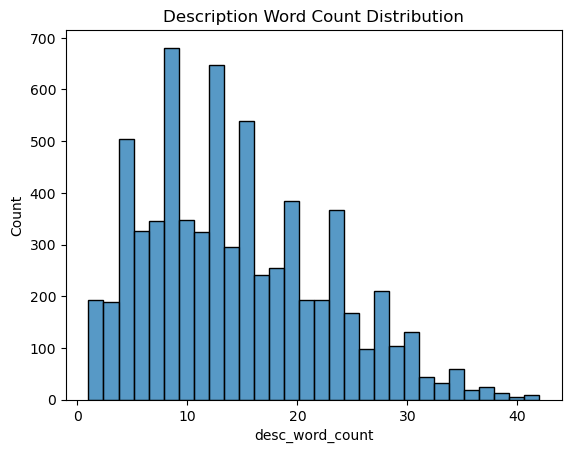

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(hs_tree['desc_word_count'], bins=30)
plt.title("Description Word Count Distribution")

In [7]:
plt.savefig("../outputs/plots/desc_word_count.png")


<Figure size 640x480 with 0 Axes>

In [8]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

hs_tree['bert_tokens'] = hs_tree['description'].apply(lambda x: len(tokenizer.tokenize(x)))
hs_tree[['description', 'bert_tokens']].head()

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

c:\Users\varsha\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:148: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\varsha\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

,description,bert_tokens
0,horses live purebred breeding animals,7
1,horses live purebred breeding animals,7
2,horses live purebred breeding animals,7
3,horses live other than purebred breeding animals,9
4,asses live,3


In [10]:
hs_tree.to_csv('../data/clean/hs_tree_with_tokens.csv', index=False)


In [11]:
flat_table['bert_tokens'] = flat_table['description'].apply(lambda x: len(tokenizer.tokenize(x)))
flat_table[['description', 'bert_tokens']].head()

,description,bert_tokens
0,horses live purebred breeding animals,7
1,horses live other than purebred breeding animals,9
2,asses live,3
3,mules and hinnies live,7
4,cattle live purebred breeding animals,7


In [12]:
flat_table.to_csv('../data/clean/flat_table_with_tokens.csv', index=False)
